# Emotion Recognition with Keras

This code demonstrates how to recognize emotions from a face image using a pre-trained ShuffleNetV2 model.

In [5]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
model_path = r'../weights/shufflenetv2_emotion_recogn.h5'
model = load_model(model_path)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 24)   216         input_1[0][0]                    
__________________________________________________________________________________________________
maxpool1 (MaxPooling2D)         (None, 12, 12, 24)   0           conv1[0][0]                      
__________________________________________________________________________________________________
stage2/block1/1x1conv_1 (Conv2D (None, 12, 12, 116)  2900        maxpool1[0][0]                   
____________________________________________________________________________________________

In [7]:
EMOTIONS = ["angry", "scared", "happy", "sad", "surprised", "neutral"]

img_path = r'../images/a.png'

image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (48, 48))
gray = gray.astype(np.float) / 255.

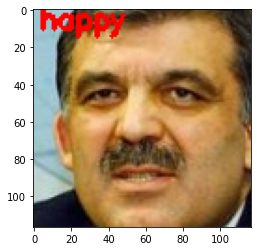

In [8]:
emo = model.predict(np.reshape(gray, (1, 48, 48, 1)))[0]

label = EMOTIONS[emo.argmax()]

cv2.putText(image, label, (3,10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))